In [12]:
import time
import matplotlib.pyplot as plt
import scipy
import numpy as np
from PIL import Image
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

np.random.seed(123)

In [13]:
from keras.preprocessing.image import ImageDataGenerator
import datetime

original_start = datetime.datetime.now()
start = datetime.datetime.now()

In [14]:
train_dir = 'data/genres_mel_spec/CNN_folders/train'
validation_dir = 'data/genres_mel_spec/CNN_folders/val/'
test_dir = 'data/genres_mel_spec/CNN_folders/test/'

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(256, 256),
        batch_size=20,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(256, 256),
                                                        batch_size=20,
                                                        class_mode='categorical')


Found 6400 images belonging to 8 classes.
Found 797 images belonging to 8 classes.


In [15]:
from keras.optimizers import RMSprop

In [18]:
from keras import layers
from keras import models
from keras import optimizers


model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(8, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])

In [19]:
# ⏰ This cell may take several minutes to run
history = model.fit_generator(train_generator, 
                              steps_per_epoch=100, 
                              epochs=25, 
                              validation_data=
                              validation_generator, 
                              validation_steps=50)

Epoch 1/25
100/100 [==============================] - 143s 1s/step - loss: 2.1756 - acc: 0.1855 - val_loss: 1.8110 - val_acc: 0.3290
Epoch 2/25
100/100 [==============================] - 140s 1s/step - loss: 1.7758 - acc: 0.3460 - val_loss: 1.6771 - val_acc: 0.3541
Epoch 3/25
100/100 [==============================] - 140s 1s/step - loss: 1.6558 - acc: 0.3985 - val_loss: 1.6781 - val_acc: 0.4243
Epoch 4/25
100/100 [==============================] - 141s 1s/step - loss: 1.5340 - acc: 0.4510 - val_loss: 1.6044 - val_acc: 0.4296
Epoch 5/25
100/100 [==============================] - 140s 1s/step - loss: 1.5387 - acc: 0.4480 - val_loss: 1.5589 - val_acc: 0.4493
Epoch 6/25
100/100 [==============================] - 141s 1s/step - loss: 1.4796 - acc: 0.4735 - val_loss: 1.4974 - val_acc: 0.4845
Epoch 7/25
100/100 [==============================] - 141s 1s/step - loss: 1.4164 - acc: 0.4945 - val_loss: 1.4626 - val_acc: 0.4855
Epoch 8/25
100/100 [==============================] - 141s 1s/step - 

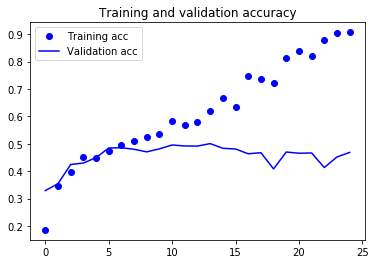

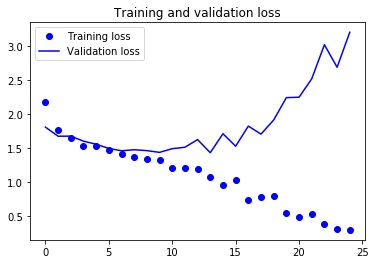

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline 

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [22]:
test_generator = test_datagen.flow_from_directory(test_dir, 
                                                  target_size=(256, 256), 
                                                  batch_size=20, 
                                                  class_mode='categorical')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 800 images belonging to 8 classes.
test acc: 0.453000001013279


In [26]:
import keras.layers import Cython

In [36]:
model2 = keras.models.Sequential()
model2.add(layers.Conv2D(filters=64, kernel_size=3,activation='relu', padding="same",
                    kernel_initializer='he_normal', input_shape=[256, 256, 3]))
model2.add(layers.BatchNormalization())
model2.add(layers.Conv2D(32,kernel_size=(3, 3), activation='relu'))
model2.add(layers.BatchNormalization())
model2.add(layers.Conv2D(32,kernel_size=5,strides=2,padding='same',activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.BatchNormalization())
            # Add dropouts to the model
model2.add(layers.Dropout(0.4))
model2.add(layers.Conv2D(64, kernel_size=(3, 3), strides=2,padding='same', activation='relu'))
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.BatchNormalization())
model2.add(layers.Conv2D(64, kernel_size=(3, 3), strides=2,padding='same', activation='relu'))
            # Add dropouts to the model
model2.add(layers.Dropout(0.4))
model2.add(layers.Flatten())
model2.add(layers.Dense(units=128, activation='relu'))
model2.add(layers.Dropout(0.4))
model2.add(layers.Dense(units=64, activation='relu'))
model2.add(layers.Dropout(0.4))
model2.add(layers.Dense(units=8, activation='softmax'))

In [37]:
model2.compile(loss='categorical_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])

In [38]:
# ⏰ This cell may take several minutes to run
history2 = model2.fit_generator(train_generator, 
                              steps_per_epoch=100, 
                              epochs=10, 
                              validation_data=
                              validation_generator, 
                              validation_steps=50)

Epoch 1/10
100/100 [==============================] - 725s 7s/step - loss: 2.2287 - acc: 0.1310 - val_loss: 1.9918 - val_acc: 0.2277
Epoch 2/10
100/100 [==============================] - 726s 7s/step - loss: 2.0274 - acc: 0.2010 - val_loss: 1.9400 - val_acc: 0.2768
Epoch 3/10
100/100 [==============================] - 724s 7s/step - loss: 1.9449 - acc: 0.2460 - val_loss: 1.7605 - val_acc: 0.3551
Epoch 4/10
100/100 [==============================] - 723s 7s/step - loss: 1.8695 - acc: 0.2700 - val_loss: 1.7460 - val_acc: 0.3280
Epoch 5/10
100/100 [==============================] - 720s 7s/step - loss: 1.8463 - acc: 0.3025 - val_loss: 1.6790 - val_acc: 0.3761
Epoch 6/10
100/100 [==============================] - 723s 7s/step - loss: 1.8496 - acc: 0.2870 - val_loss: 1.6744 - val_acc: 0.3771
Epoch 7/10
100/100 [==============================] - 715s 7s/step - loss: 1.8097 - acc: 0.3070 - val_loss: 1.5760 - val_acc: 0.4614
Epoch 8/10
100/100 [==============================] - 712s 7s/step - 

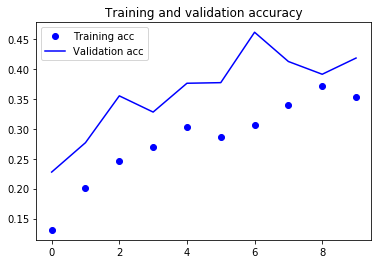

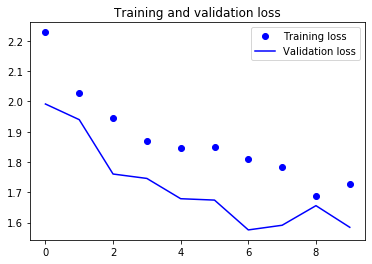

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline 

acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [41]:
test_generator = test_datagen.flow_from_directory(test_dir, 
                                                  target_size=(256, 256), 
                                                  batch_size=20, 
                                                  class_mode='categorical')
test_loss, test_acc = model2.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 800 images belonging to 8 classes.
test acc: 0.4130000001192093


In [42]:
train_loss, train_acc = model2.evaluate_generator(train_generator, steps=50)
print('train acc:', train_acc)

train acc: 0.4000000014901161


In [43]:
# ⏰ This cell may take several minutes to run
history3 = model2.fit_generator(train_generator, 
                              steps_per_epoch=50, 
                              epochs=10, 
                              validation_data=
                              validation_generator, 
                              validation_steps=50)

Epoch 1/10
50/50 [==============================] - 397s 8s/step - loss: 1.7076 - acc: 0.4040 - val_loss: 1.5537 - val_acc: 0.4393
Epoch 2/10
50/50 [==============================] - 405s 8s/step - loss: 1.6847 - acc: 0.3810 - val_loss: 1.5988 - val_acc: 0.4403
Epoch 3/10
50/50 [==============================] - 400s 8s/step - loss: 1.7259 - acc: 0.3670 - val_loss: 1.6299 - val_acc: 0.3831
Epoch 4/10
50/50 [==============================] - 398s 8s/step - loss: 1.7732 - acc: 0.3740 - val_loss: 1.5490 - val_acc: 0.4547
Epoch 5/10
50/50 [==============================] - 406s 8s/step - loss: 1.6404 - acc: 0.4110 - val_loss: 1.6066 - val_acc: 0.4373
Epoch 6/10
50/50 [==============================] - 408s 8s/step - loss: 1.6483 - acc: 0.3900 - val_loss: 1.6321 - val_acc: 0.4483
Epoch 7/10
50/50 [==============================] - 409s 8s/step - loss: 1.6486 - acc: 0.4040 - val_loss: 1.5686 - val_acc: 0.4142
Epoch 8/10
50/50 [==============================] - 423s 8s/step - loss: 1.6076 - a

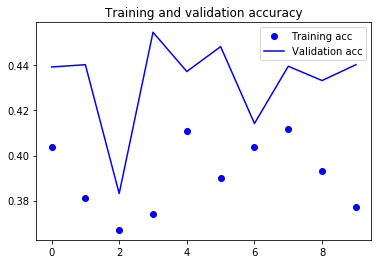

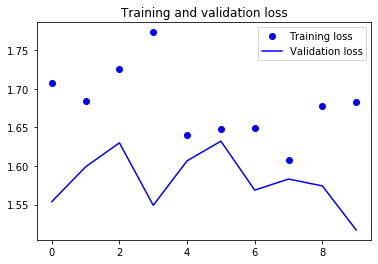

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline 

acc = history3.history['acc']
val_acc = history3.history['val_acc']
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [45]:
test_loss, test_acc = model2.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

test acc: 0.45700000107288363


In [46]:
train_loss, train_acc = model2.evaluate_generator(train_generator, steps=50)
print('train acc:', train_acc)

train acc: 0.48800000190734866


In [ ]:
# ⏰ This cell may take several minutes to run
history4 = model2.fit_generator(train_generator, 
                              steps_per_epoch=100, 
                              epochs=10, 
                              validation_data=
                              validation_generator, 
                              validation_steps=50)